In [11]:
import pandas as pd

In [12]:
df = pd.read_excel("../../data/train.xlsx")
df

,EA_acu,EA_pcu,EA_time,developer,followers_total,is_release,description,entity_region,EA_units_sold,developer_id,...,steam_genre,entity_type,entity_country,date,entity_name,EA_revenue,release_time,pheat,developer_revenue_p1_year,publisher_revenue_p1_year
0,0.0,1645.0,2016-10-05,Hangar 13,0.0,1,Mafia III: Definitive Edition includes the mai...,global,486.0,aab276cc-39ef-440b-b422-ff65c50a4a52,...,Racing|Action|Shooter|Action Games|Open World|...,steam,global,2017-10-22,Mafia III: Definitive Edition,15548.0,2020-05-20,8.086718,32355072.0,45040557.0
1,0.0,80.0,2015-07-29,Digitalmindsoft,0.0,1,Call to Arms offers an innovative mix of real-...,global,412.0,3aaebbb2-6a06-4bc1-94f5-1ff294155914,...,Real-Time Tactics|Strategy|Strategy Games,steam,global,2015-12-14,Call to Arms,6589.0,2018-04-27,0.000000,5615906.0,5615906.0
2,0.0,1410.0,2014-08-01,Brilliant Skies Ltd.,0.0,1,SummaryIn From the Depths you can build and ta...,global,150.0,ed884bba-8518-479a-a38a-6bdf610040f6,...,Action Games|Simulation|Sandbox|Strategy,steam,global,2015-11-08,From the Depths,2399.0,2020-11-07,6.962243,338769.0,338769.0
3,0.0,54.0,2017-12-30,Dandylion,0.0,1,Everything that SRPG could possibly beTROUBLES...,global,30.0,1341f6f8-d4c1-11ec-9bb0-525400d129b6,...,Casual Games|TROUBLESHOOTER: Abandoned Childre...,steam,global,2018-08-18,TROUBLESHOOTER: Abandoned Children,480.0,2020-04-23,6.919684,181707.0,181707.0
4,0.0,22.0,2015-05-27,Lighthouse Games Studio,0.0,1,Shark Attack Deathmatch 2 captures the thrill ...,global,40.0,597807b4-1fca-4848-86e2-8038ef9b90cc,...,Action Games,steam,global,2016-02-14,Shark Attack Deathmatch 2,160.0,2019-07-26,2.833213,43858.0,43858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154283,0.0,15.0,2015-01-22,Reakktor Studios,0.0,1,FRAG LIKE IT'S 1999TOXIKK™ plays as if today's...,global,0.0,0a4abc7e-3b55-468f-a9be-140cefce091c,...,Action Games|FPS|Vehicle Combat|Shooter,steam,global,2015-12-13,TOXIKK,0.0,2016-09-11,7.407318,1244943.0,1244943.0
154284,0.0,15.0,2019-09-05,Little Green Men Games,0.0,1,Step into the laid-back shoes of captain Jonat...,global,30.0,a5cafe3c-d4be-11ec-9bb0-525400d129b6,...,Action|Simulation|Sci-fi|RPG Games|RPG|Strategy,steam,global,2020-04-17,Starpoint Gemini 3,600.0,2020-11-06,5.370638,1079021.0,1079021.0
154285,0.0,15.0,2017-04-19,Angry Mob Games,0.0,1,A new challenger has appeared in the platform ...,global,0.0,d470dc9c-c6b8-8ce7-379b-a44140af1998,...,Indie|Arcade|Indie Games|2D Fighting|Fighting,steam,global,2017-08-25,Brawlout,0.0,2018-08-21,3.526361,79199.0,79199.0
154286,0.0,15.0,2015-12-08,Terminal Press,0.0,1,Death Goat is a bloody arcade shooter featurin...,global,0.0,115c6832-d4c1-11ec-9bb0-525400d129b6,...,Action Games|Indie,steam,global,2016-02-07,Death Goat,0.0,2016-06-08,5.332719,8402.0,8402.0


In [13]:

# How many records in train dataset
len(df)

154288

In [14]:
# How many games
len(df["edition_id"].unique())

2246

<AxesSubplot:>

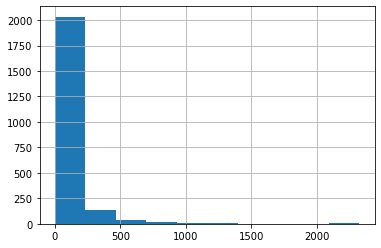

In [15]:
# How many records for each edition_id
df.groupby("edition_id").size().hist()

In [16]:
# How many features
len(df.columns)

29

In [17]:
# What are the features
df.dtypes

EA_acu                              float64
EA_pcu                              float64
EA_time                      datetime64[ns]
developer                            object
followers_total                     float64
is_release                            int64
description                          object
entity_region                        object
EA_units_sold                       float64
developer_id                         object
tag_list                             object
is_EA                                 int64
publisher_id                         object
first_create_time            datetime64[ns]
sub_genre                            object
edition_id                           object
wishlist_rank                       float64
genre                                object
publisher                            object
steam_genre                          object
entity_type                          object
entity_country                       object
date                         dat

In [18]:
# What feature could be very important (Y is pheat)
df['wishlist_rank'].corr(df['pheat']), df['followers_total'].corr(df['pheat']), df['developer_revenue_p1_year'].corr(df['pheat']), df['publisher_revenue_p1_year'].corr(df['pheat'])

(-0.6266641526546421, nan, 0.20755954107926228, 0.24880439317839625)

In [19]:
# Quickly understand the distribution (only numerical features)
df.describe()

,EA_acu,EA_pcu,followers_total,is_release,EA_units_sold,is_EA,wishlist_rank,EA_revenue,pheat,developer_revenue_p1_year,publisher_revenue_p1_year
count,137175.000000,137175.000000,137175.0,154288.0,137175.000000,154288.0,17486.000000,1.371750e+05,154288.000000,1.295560e+05,1.331050e+05
mean,5.427837,248.193308,0.0,1.0,147.620295,1.0,505.170308,1.982525e+03,3.800845,1.465610e+06,4.466809e+06
std,143.273486,1328.919779,0.0,0.0,981.209329,0.0,331.537413,2.833311e+04,2.741338,1.051593e+07,2.203235e+07
min,0.000000,0.000000,0.0,1.0,0.000000,1.0,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,0.0,1.0,0.000000,1.0,216.250000,0.000000e+00,1.609438,1.031700e+04,1.555200e+04
50%,0.000000,4.000000,0.0,1.0,0.000000,1.0,470.000000,0.000000e+00,3.637586,6.327000e+04,1.057150e+05
75%,0.000000,32.000000,0.0,1.0,80.000000,1.0,793.000000,6.120000e+02,5.697093,3.336380e+05,9.741690e+05
max,15410.000000,93097.000000,0.0,1.0,122379.000000,1.0,1326.000000,5.873213e+06,11.797856,3.083610e+08,4.409961e+08
